### Outlier detection using IQR

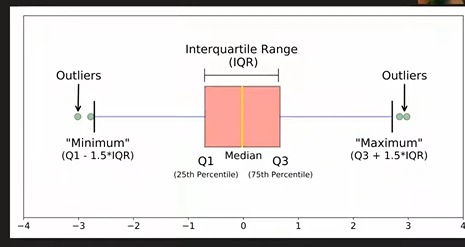

We use a boxplot and all the values out of min and max are considered outliers. We use this method when the data is quite skewed

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('placement.csv')

In [3]:
df.sample(3)

,cgpa,placement_exam_marks,placed
469,5.86,46.0,1
635,6.69,10.0,0
928,6.63,32.0,0


C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_18340\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_18340\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


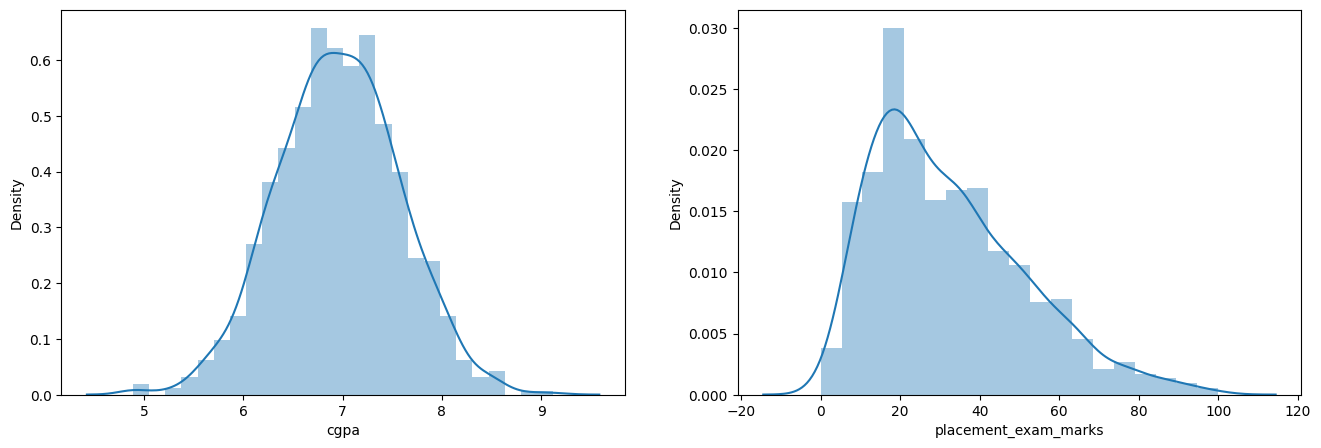

In [4]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

The placement marks are skewed so we can use iqr for outlier detection

In [5]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [6]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


In [7]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

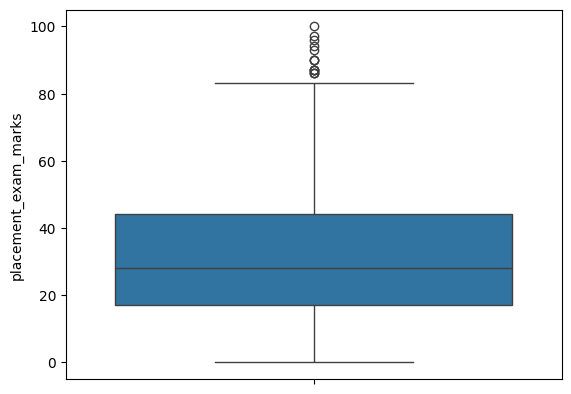

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
# finding the iqr

percentile_25=df['placement_exam_marks'].quantile(0.25)
percentile_75=df['placement_exam_marks'].quantile(0.75)



In [10]:
iqr=percentile_75-percentile_25

In [11]:
iqr

27.0

In [12]:
upper_limit=percentile_75+1.5*iqr
lower_limit=percentile_25-1.5*iqr

In [13]:
print("Upper limit: ", upper_limit)
print("Lower limit: ", lower_limit)

Upper limit:  84.5
Lower limit:  -23.5


### Finding outliers

In [16]:
df[(df['placement_exam_marks']>upper_limit) | (df['placement_exam_marks'] <  lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


### Trimming

In [17]:
new_df=df[(df['placement_exam_marks']<upper_limit) & (df['placement_exam_marks'] >  lower_limit)]

In [18]:
new_df.shape

(985, 3)

<Axes: ylabel='placement_exam_marks'>

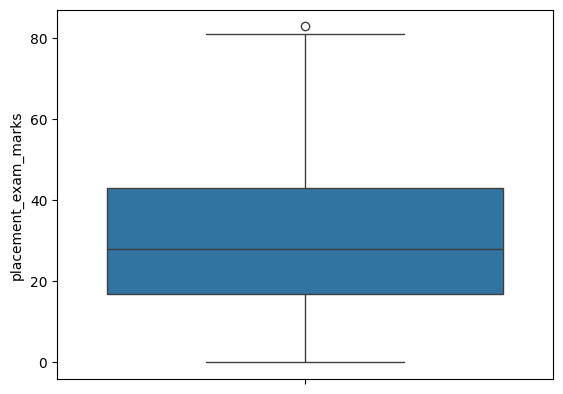

In [21]:

sns.boxplot(new_df['placement_exam_marks'])

<Axes: ylabel='placement_exam_marks'>

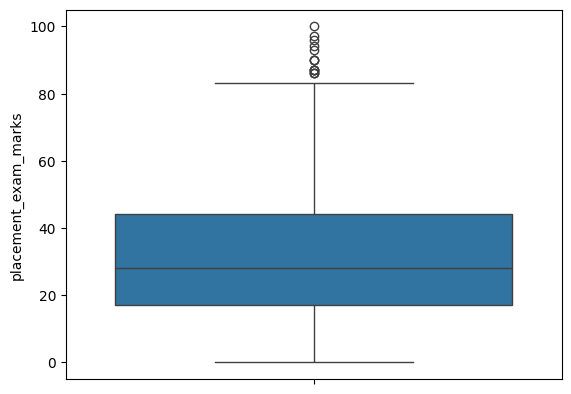

In [20]:
sns.boxplot(df['placement_exam_marks'])

In [22]:
df['placement_exam_marks'] = np.where(
    df['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

<Axes: ylabel='placement_exam_marks'>

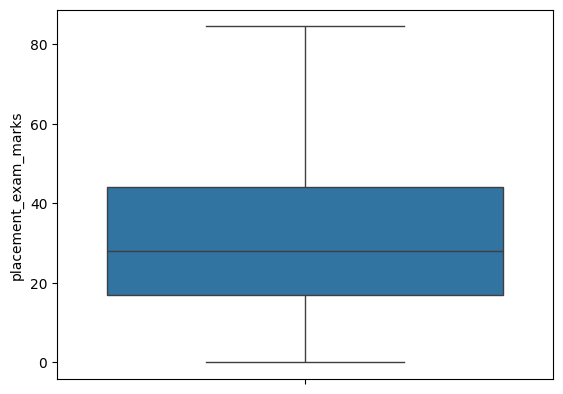

In [24]:
# no outliers now
sns.boxplot(df['placement_exam_marks'])